In [2]:
import statsmodels.api as sm
import pandas as pd

In [5]:
df = sm.datasets.macrodata.load_pandas().data
index = pd.DatetimeIndex(start='1959Q1', end='2009Q4', freq='Q')
df.set_index(index, inplace=True)
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [10]:
cycle, trend = sm.tsa.filters.hpfilter(df.realgdp, 1600)
gdp_decomp = df[['realgdp']]
gdp_decomp.loc[:, "cycle"] = cycle
gdp_decomp.loc[:, "trend"] = trend
gdp_decomp.head()

/home/aidin/miniconda3/envs/reb/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/aidin/miniconda3/envs/reb/lib/python3.6/site-packages/pandas/core/indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,realgdp,cycle,trend
1959-03-31,2710.349,39.511915,2670.837085
1959-06-30,2778.801,80.088532,2698.712468
1959-09-30,2775.488,48.875455,2726.612545
1959-12-31,2785.204,30.591933,2754.612067
1960-03-31,2847.699,64.882667,2782.816333


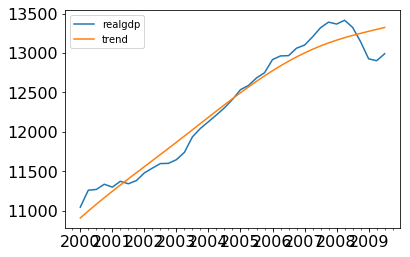

In [14]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
gdp_decomp[["realgdp", "trend"]]["2000-03-31":].plot(ax=ax, fontsize=16);
plt.show()


In [12]:
cycle

1959-03-31     39.511915
1959-06-30     80.088532
1959-09-30     48.875455
1959-12-31     30.591933
1960-03-31     64.882667
1960-06-30     23.040242
1960-09-30     -1.355312
1960-12-31    -67.462365
1961-03-31    -81.367438
1961-06-30    -60.167890
1961-09-30    -46.369224
1961-12-31    -20.695339
1962-03-31     -2.162153
1962-06-30     -4.718648
1962-09-30    -13.556457
1962-12-31    -44.369262
1963-03-31    -43.320274
1963-06-30    -44.546971
1963-09-30    -26.298758
1963-12-31    -44.261196
1964-03-31    -14.434412
1964-06-30    -20.266867
1964-09-30    -19.137001
1964-12-31    -54.824590
1965-03-31    -15.962445
1965-06-30    -13.740115
1965-09-30     13.254828
1965-12-31     56.030402
1966-03-31    103.074337
1966-06-30     72.175348
                 ...    
2002-06-30    -95.260035
2002-09-30   -114.798768
2002-12-31   -190.025905
2003-03-31   -221.225647
2003-06-30   -207.139428
2003-09-30    -89.685415
2003-12-31    -61.895316
2004-03-31    -56.628782
2004-06-30    -49.616781
